In [2]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_market_data = scaler.fit_transform(df_market_data)

In [7]:
# Create a DataFrame with the scaled data
normalized_df = pd.DataFrame(scaled_market_data, columns=df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the original DataFrame
crypto_names = df_market_data.index

# Display the scaled DataFrame
normalized_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [9]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_market_data)
    inertia_values.append(kmeans.inertia_)
print(inertia_values)

[287.0, 212.1233420748626, 170.193570879703, 79.02243535120975, 71.0979135124442, 66.10882678044752, 54.48812315624117, 43.22469266658042, 32.86088447122681, 28.404884636873092, 24.116198421409198]


c:\Users\NECEE\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\NECEE\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\NECEE\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\NECEE\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

In [10]:
k_values = range(1, 12)
inertia_values = [287.0, 212.1233420748626, 170.193570879703, 79.02243535120975, 71.0979135124442, 66.10882678044752, 54.48812315624117, 43.22469266658042, 32.86088447122681, 28.404884636873092, 24.116198421409198]  # Replace with real values

In [11]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(k_values),
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

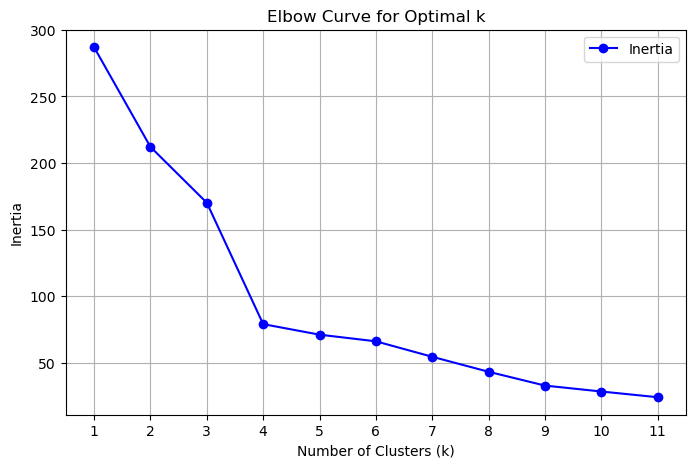

In [12]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='blue', label='Inertia')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid()
plt.legend()
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** From the plot above the "elbow" is located at k = 3. After this point, the reduction in inertia becomes much smaller, indicating that adding more clusters does not significantly improve the model. Therefore, k = 3 is likely the optimal value for the number of clusters.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [13]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=3, random_state=42)

In [14]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(scaled_market_data)

c:\Users\NECEE\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predicted_clusters = kmeans.predict(scaled_market_data)

# Print the resulting array of cluster values.
print(predicted_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 0 0 2 2 1
 2 2 2 2]


In [16]:
# Create a copy of the scaled DataFrame
scaled_market_data_copy = scaled_market_data.copy()

In [ ]:
# Retrieve the coin_id index from the original DataFrame
#coin_ids = df_market_data.index

coin_ids =df_market_data['coin_id']

In [26]:
assert scaled_market_data_copy.shape[0] == len(coin_ids), "Row mismatch detected!"

In [28]:
scaled_market_data_copy = pd.DataFrame(
    scaled_market_data_copy,
    columns=[
        "price_change_percentage_24h",
        "price_change_percentage_7d",
        "price_change_percentage_14d",
        "price_change_percentage_30d",
        "price_change_percentage_60d",
        "price_change_percentage_200d",
        "price_change_percentage_1y"
    ]
)

# Reassign the coin_id as the index
scaled_market_data_copy.index = coin_ids

# Verify the structure
print(scaled_market_data_copy.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [29]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
scaled_market_data_copy['Predicted_clusters'] = predicted_clusters

# Display the copy of the scaled DataFrame
scaled_market_data_copy.head()

#print(scaled_market_data_copy.head())

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Predicted_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [30]:
print(scaled_market_data_copy.columns)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'Predicted_clusters'],
      dtype='object')


In [32]:
#assert scaled_market_data_copy.shape[0] == len(coin_ids), "Row mismatch detected!"

In [31]:
#print(scaled_market_data_copy.head())  # Check the first few rows
#print(scaled_market_data_copy.info())  # Verify data types and non-null counts

In [33]:
# Check cluster values
if "Predicted_Cluster" not in scaled_market_data_copy.columns:
    print("Predicted_Cluster column is missing!")
else:
    print(scaled_market_data_copy["Predicted_Cluster"].unique())

Predicted_Cluster column is missing!


In [34]:
#Re-assign predicted clusters
scaled_market_data_copy["Predicted_Cluster"] = predicted_clusters

In [ ]:
#scaled_market_data_copy = scaled_market_data_copy.reset_index()

In [35]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
# Create the scatter plot
cluster_scatter_plot = scaled_market_data_copy.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    color="Predicted_Cluster",  # Color the points by the predicted clusters
    cmap='viridis',  # Optional: Choose a color map for clusters
    hover_cols=['coin_id'],  # Display the cryptocurrency name on hover
    title="Cryptocurrency Clusters (24h vs 7d Change)",
    xlabel="24h Price Change Percentage",
    ylabel="7d Price Change Percentage",
    size=10
)
# Show the plot
cluster_scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Predicted_Cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [36]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [37]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(scaled_market_data)

# View the scaled PCA data
pca_data

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527],
       [-0.51653377,  1.38837748,  0.80407131],
       [-0.45071134,  0.51769912,  2.84614316],
       [-0.34559977,  0.72943939,  1.47801284],
       [-0.64946792,  0.43216514,  0.60030286],
       [-0.75901394, -0.20119979, -0.21765292],
       [-0.24819846, -1.37625159, -1.46202571],
       [-0.43840762, -0.17533654, -0.6633884 ],
       [-0.69342533, -0.47381462, -0.52759693],
       [ 0.06049915,  2.90940385,  1.49857131],
       [-0.39335243, -0.10819197, -0.01275608],
       [-0.79617564, -0.49440875,  1.08281169],
       [ 0.06407452, -1.26982514, -1.09882928],
       [-0.48901506, -0.73271912, -0.06254323],
       [-0.3062723 ,  0.70341515,  1.71422359],
       [-0.51352775, -0.14280239, -0.65656583],
       [-0.36212044, -0.98691441, -0.728

In [38]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_

# Display the explained variance ratio
print("Explained Variance Ratio for each component:")
print(explained_variance_ratio)

Explained Variance Ratio for each component:
[0.3719856  0.34700813 0.17603793]


In [39]:
# Calculate the total explained variance for the three principal components
total_explained_variance = explained_variance_ratio.sum()

# Print the total explained variance
print(f"Total Explained Variance for the first 3 components: {total_explained_variance:.4f}")

Total Explained Variance for the first 3 components: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950

In [40]:
print(type(scaled_market_data))

<class 'numpy.ndarray'>


In [43]:
# 1. Extract coin_id
coin_id = df_market_data.index


In [44]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(pca.fit_transform(scaled_market_data), columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original scaled DataFrame
pca_df["coin_id"] = coin_id

# Set the coin_id column as index
pca_df.set_index('coin_id', inplace=True)

#Display the scaled PCA DataFrame
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [45]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [46]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia_values.append(kmeans.inertia_)
print(inertia_values)


[256.87408556789234, 182.3395300777564, 140.4318329840836, 49.665496651797355, 42.05190109791724, 31.749005244389014, 28.031869172552742, 19.451747206041347, 13.814081971558092, 10.630647573870965, 10.120242629957758]


c:\Users\NECEE\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\NECEE\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\NECEE\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\NECEE\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

In [47]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(k_values),
    'inertia': inertia_values
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df2 = pd.DataFrame(elbow_data)

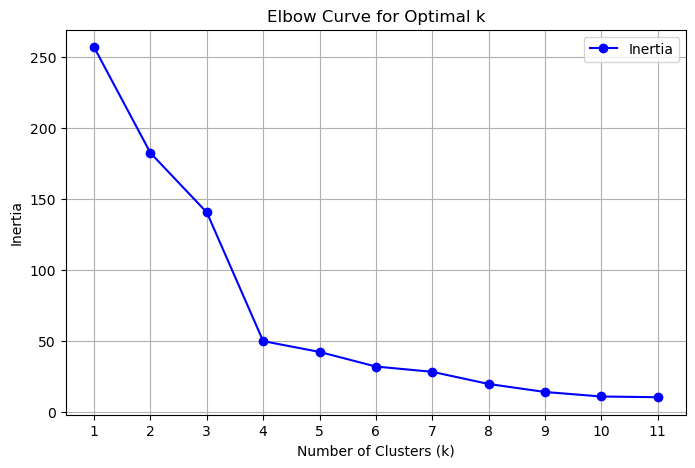

In [48]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(elbow_df2['k'], elbow_df2['inertia'], marker='o', linestyle='-', color='blue', label='Inertia')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df2['k'])
plt.grid()
plt.legend()
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The optimal number of clusters, k = 4,


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** `k` is consistent between both the original data and the PCA-transformed data. This suggests that PCA did not alter the clustering structure significantly but may have streamlined the computation and improved clarity.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [49]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)

In [50]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

c:\Users\NECEE\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [51]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
predicted_clusters = kmeans.predict(pca_df)

# Print the resulting array of cluster values.
print(predicted_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [52]:
pca_data

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527],
       [-0.51653377,  1.38837748,  0.80407131],
       [-0.45071134,  0.51769912,  2.84614316],
       [-0.34559977,  0.72943939,  1.47801284],
       [-0.64946792,  0.43216514,  0.60030286],
       [-0.75901394, -0.20119979, -0.21765292],
       [-0.24819846, -1.37625159, -1.46202571],
       [-0.43840762, -0.17533654, -0.6633884 ],
       [-0.69342533, -0.47381462, -0.52759693],
       [ 0.06049915,  2.90940385,  1.49857131],
       [-0.39335243, -0.10819197, -0.01275608],
       [-0.79617564, -0.49440875,  1.08281169],
       [ 0.06407452, -1.26982514, -1.09882928],
       [-0.48901506, -0.73271912, -0.06254323],
       [-0.3062723 ,  0.70341515,  1.71422359],
       [-0.51352775, -0.14280239, -0.65656583],
       [-0.36212044, -0.98691441, -0.728

In [53]:
# Create a copy of the scaled PCA DataFrame
scaled_pca_copy = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
scaled_pca_copy['Predicted_Cluster'] = predicted_clusters

# Display the copy of the scaled PCA DataFrame
scaled_pca_copy.head()

,PC1,PC2,PC3,Predicted_Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [54]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
pca_scatter_plot = scaled_pca_copy.hvplot.scatter(
    x='PC1',  # First principal component
    y='PC2',  # Second principal component
    c='Predicted_Cluster',  # Color by the predicted clusters
    cmap='viridis',  # Optional: Choose a color map
    hover_cols=['coin_id'],  # Display the cryptocurrency name on hover
    title="Cryptocurrency Clusters (PCA: PC1 vs PC2)",  # Title of the plot
    xlabel="Principal Component 1 (PC1)",  # X-axis label
    ylabel="Principal Component 2 (PC2)",  # Y-axis label
    size=10  # Optional: Adjust point size
)

pca_scatter_plot

:Scatter   [PC1]   (PC2,Predicted_Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

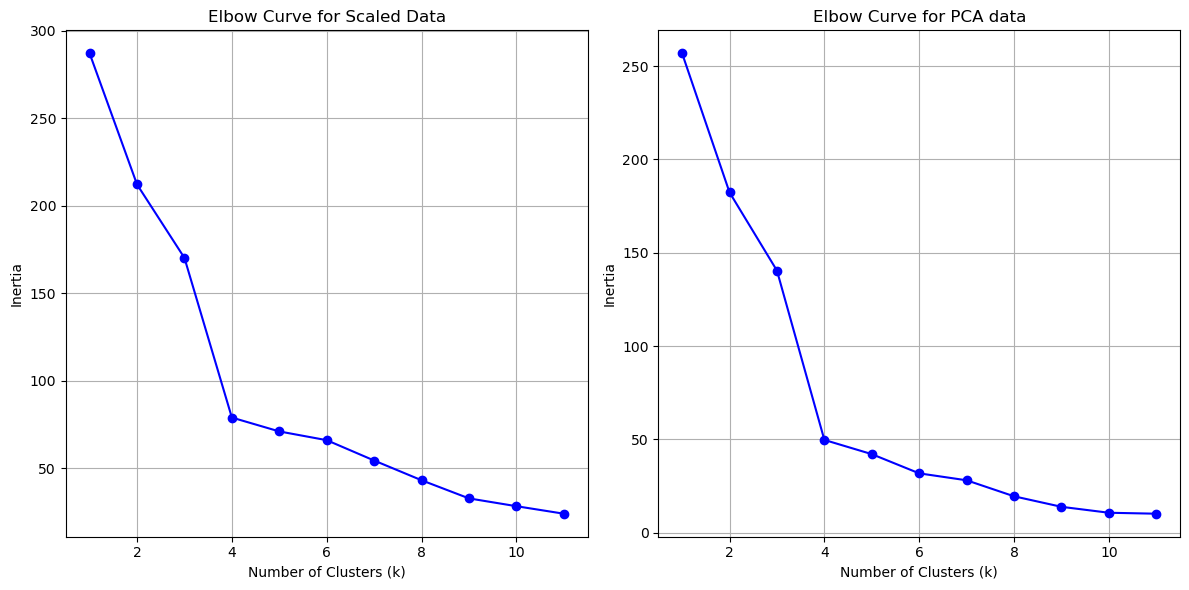

In [55]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # (rows, columns, plot number)
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', color='blue')
plt.title('Elbow Curve for Scaled Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()

plt.subplot(1, 2, 2)  # (rows, columns, plot number)
plt.plot(elbow_df2['k'], elbow_df2['inertia'], marker='o', color='blue')
plt.title('Elbow Curve for PCA data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()

plt.tight_layout()
plt.show()

In [56]:
# Composite plot to contrast the clusters
cluster_scatter_plot + pca_scatter_plot

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Predicted_Cluster,coin_id)
   .Scatter.II :Scatter   [PC1]   (PC2,Predicted_Cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Generally, reducing the number of features can help speed up the clustering process and make it more interpretable in some cases, particularly when dimensionality reduction techniques like PCA are used. However, this should be done carefully, as it can lead to the loss of key information that differentiates clusters, resulting in less meaningful clustering outcomes. The goal should always be to strike a balance: use enough features to capture the complexity of the data, but not so many that you introduce unnecessary computational complexity.

It’s important to evaluate the quality of the clusters by inspecting their interpretability and cohesion after reducing features, and compare clustering results using both reduced and full features to determine the best approach.